In [64]:
%pylab inline
%load_ext autoreload
%autoreload 2


import datetime
import pandas as pd
import numpy as np
import scipy
import bt
import ffn

import seaborn as sns
# import seaborn as sns
sn.set_style('dark')

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/tmqr/anaconda3/envs/env_v1/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['spy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


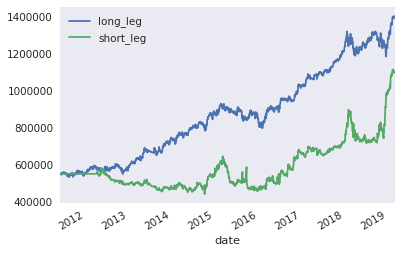

In [66]:
long_leg = pd.DataFrame(pd.read_csv('long_leg.csv', parse_dates=True))
long_leg.columns = [['date','long_leg']]
long_leg.index = long_leg['date']
del long_leg['date']


short_leg = pd.DataFrame(pd.read_csv('short_leg.csv', parse_dates=True))
short_leg.columns = [['date','short_leg']]
short_leg.index = short_leg['date']
del short_leg['date']


short_leg.tail()




total = bt.merge(long_leg, short_leg)
total.index = pd.to_datetime(total.index)
total.plot()

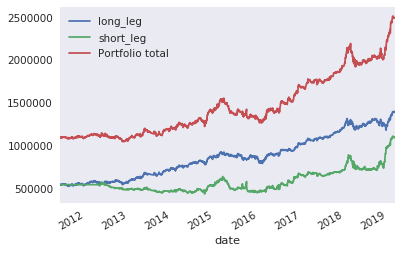

In [67]:
total['Portfolio total'] = total.sum(axis=1)
total.plot()

In [68]:
spy = bt.get('spy', start='2010-01-01')
amzn = bt.get('gld', start='2010-01-01')

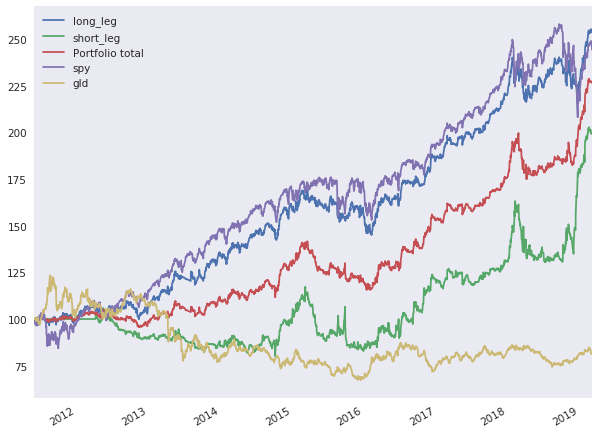

In [69]:
comp = bt.merge(total, spy, amzn).dropna()

ffn.rebase(comp).plot(figsize=(10,8))

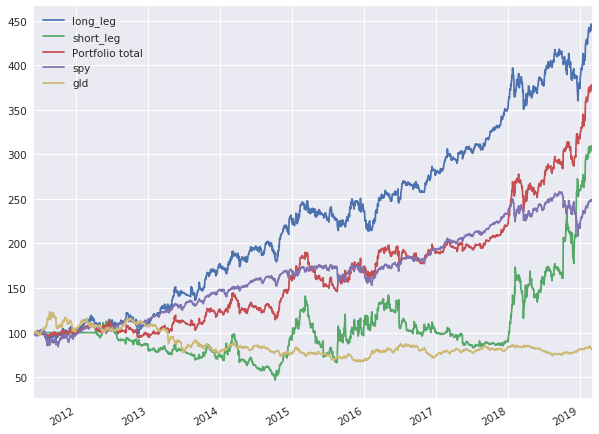

In [45]:
comp = bt.merge(total, spy, amzn).dropna()

ffn.rebase(comp).plot(figsize=(10,8))

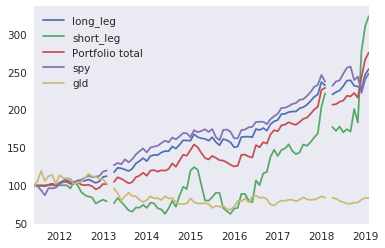

In [63]:
a = ffn.rebase(comp).ffill()
a.asfreq('BM').plot()

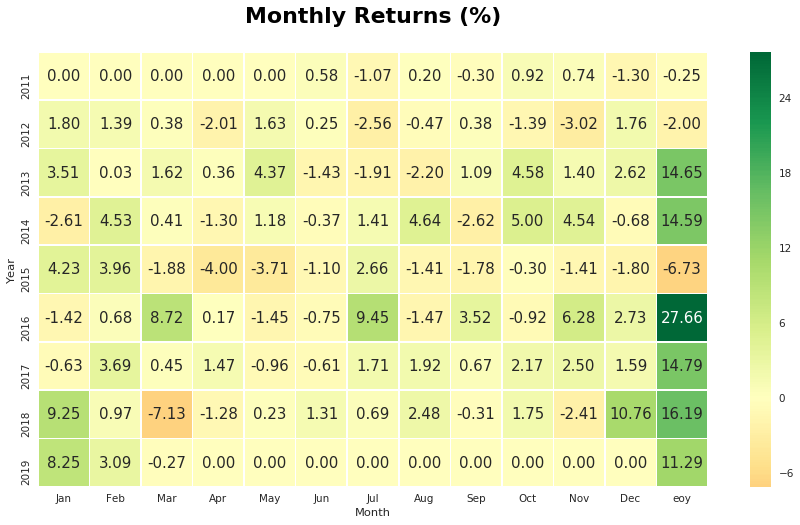

In [70]:
import monthly_returns_heatmap as mrh
returns = total['Portfolio total'].pct_change()
mrh.plot(returns,figsize=(15,8),eoy=True,annot_size=15,title_size=22)

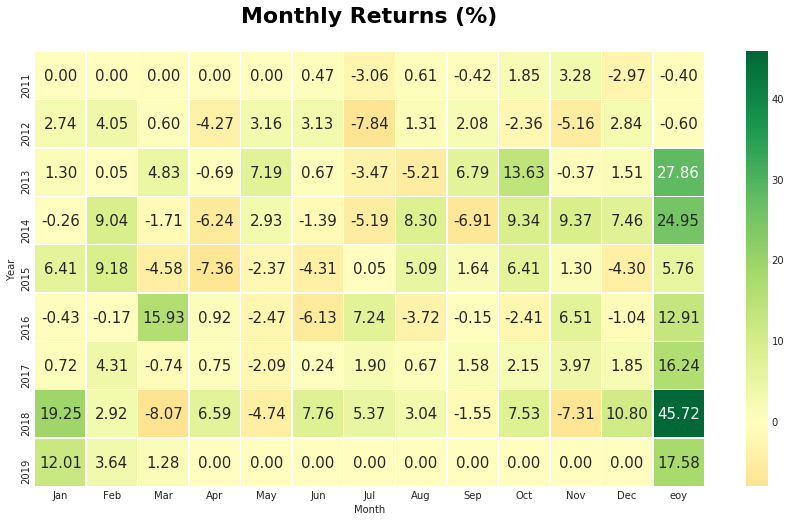

In [30]:
import monthly_returns_heatmap as mrh
returns = total['Portfolio total'].pct_change()
mrh.plot(returns,figsize=(15,8),eoy=True,annot_size=15,title_size=22)

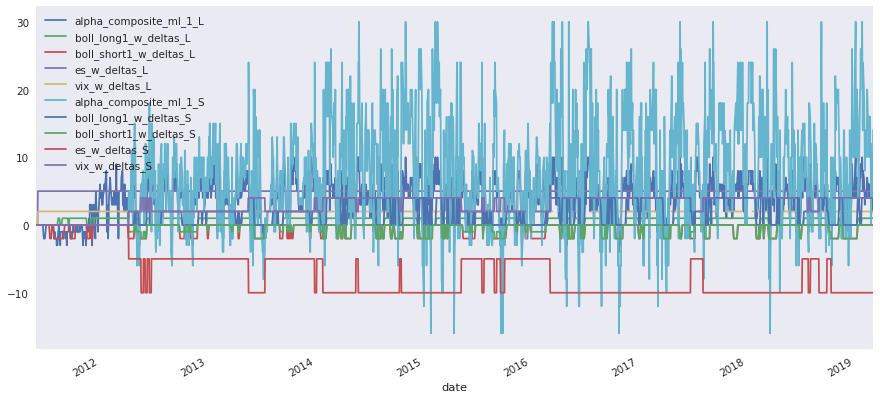

In [71]:
long_leg_delta = pd.DataFrame(pd.read_csv('long_leg_deltas.csv', parse_dates=True))
long_leg_delta.columns = [['date','alpha_composite_ml_1_L',
                          'boll_long1_w_deltas_L',
                          'boll_short1_w_deltas_L',
                          'es_w_deltas_L',
                          'vix_w_deltas_L']]
long_leg_delta.index = long_leg_delta['date']
del long_leg_delta['date']


short_leg_delta = pd.DataFrame(pd.read_csv('short_leg_deltas.csv', parse_dates=True))
short_leg_delta.columns = [['date','alpha_composite_ml_1_S',
                           'boll_long1_w_deltas_S',
                           'boll_short1_w_deltas_S',
                           'es_w_deltas_S',
                           'vix_w_deltas_S']]
short_leg_delta.index = short_leg_delta['date']
del short_leg_delta['date']


# short_leg.tail()

total_delta = bt.merge(long_leg_delta, short_leg_delta)
total_delta.index = pd.to_datetime(total_delta.index)
total_delta.plot(figsize=(15,7))

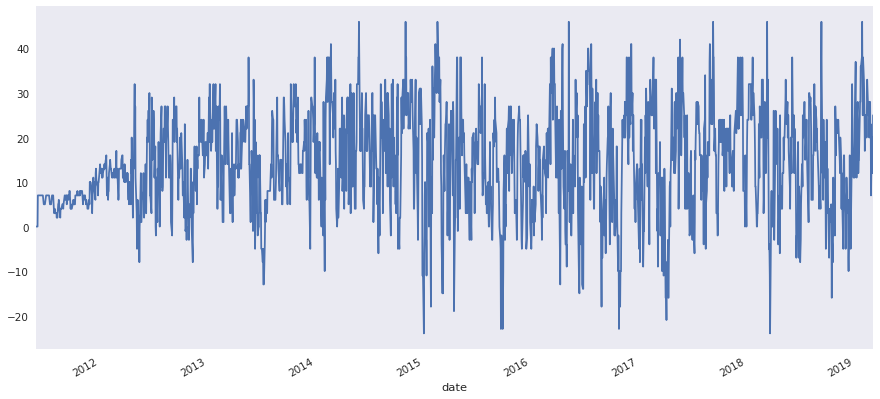

In [72]:
total_delta.sum(axis=1).plot(figsize=(15,7))

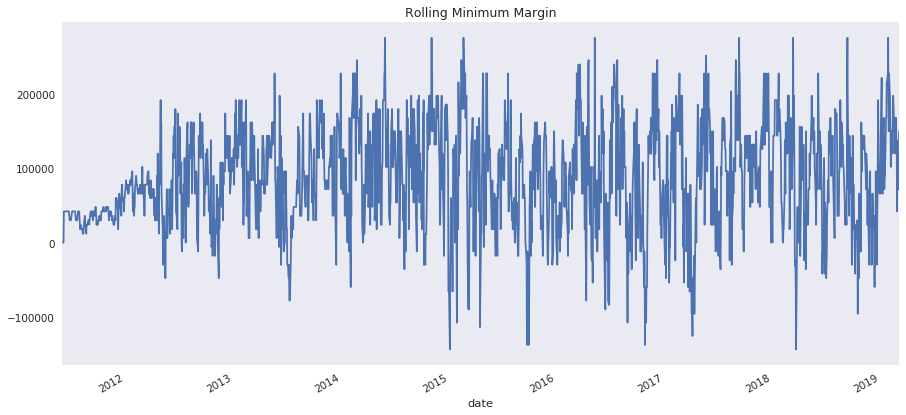

In [73]:
total_delta.sum(axis=1).mul(6000).plot(figsize=(15,7), title='Rolling Minimum Margin')

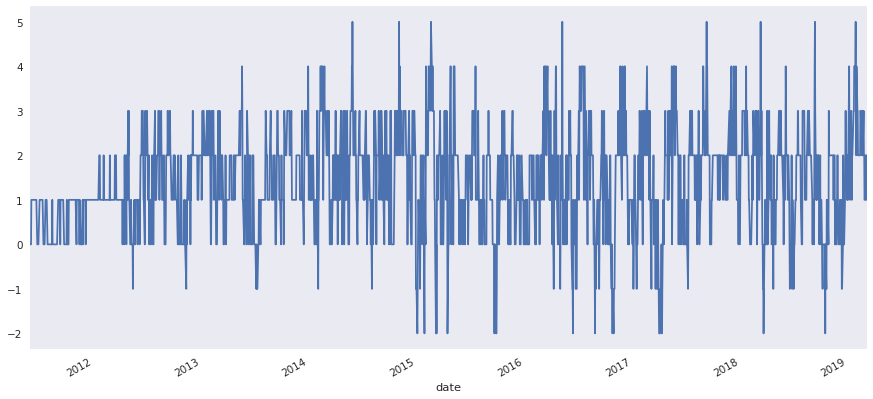

In [74]:
total_delta.sum(axis=1).div(10).mul(1).round().plot(figsize=(15,7))

In [75]:
comp.tail()

,long_leg,short_leg,Portfolio total,spy,gld
2019-03-01,1405232.5,1097283.5,2502516.0,280.420013,121.879997
2019-03-04,1397720.5,1096641.5,2494362.0,279.399994,121.559998
2019-03-05,1398339.5,1098473.5,2496813.0,279.019989,121.720001
2019-03-06,1398339.5,1098473.5,2496813.0,277.329987,121.610001
2019-03-07,1398330.5,1098443.5,2496774.0,275.010010,121.510002


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

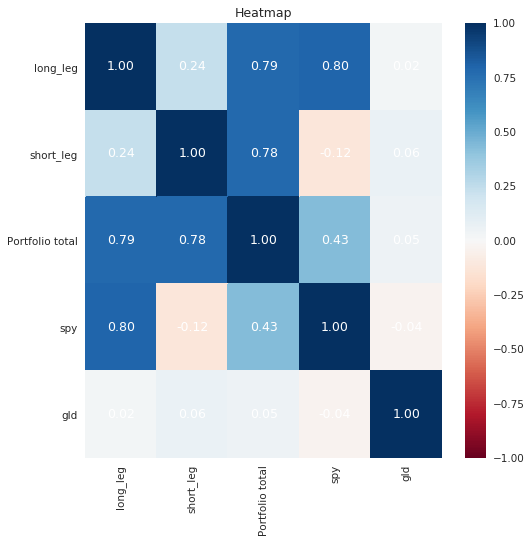

In [76]:


returns = comp.to_log_returns().dropna()

returns.corr().as_format('.2f')

sns.set(font_scale=1.04)

returns.plot_corr_heatmap(figsize=(8,8),)
plt.xticks(rotation=90) 